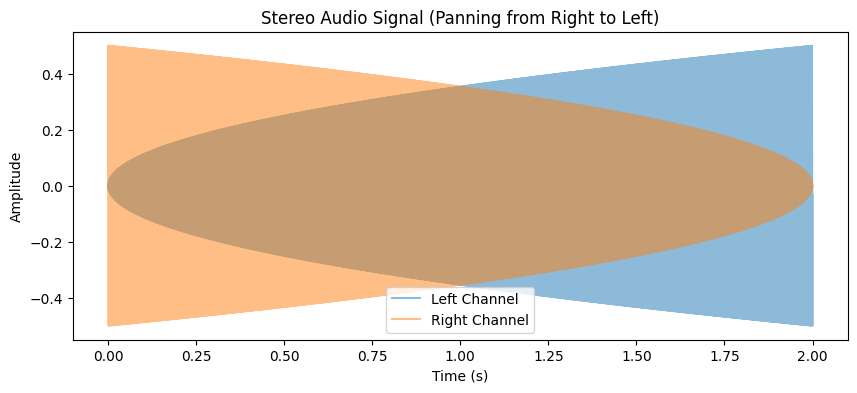

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

def pan_audio(audio, pan):    
    pan = np.clip(pan, -1.0, 1.0)
        
    left_gain = np.sqrt((1.0 - pan) / 2.0)
    right_gain = np.sqrt((1.0 + pan) / 2.0)
        
    stereo_audio = np.stack([audio * left_gain, audio * right_gain], axis=-1)
    return stereo_audio

sample_rate = 44100  
duration = 2.0       
frequency = 440.0    

t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
mono_audio = 0.5 * np.sin(2 * np.pi * frequency * t)

pan_values = np.linspace(1.0, -1.0, len(t))

stereo_audio = np.array([pan_audio(mono_audio[i], pan_values[i]) for i in range(len(t))])

write("./Output/panned_audio.wav", sample_rate, (stereo_audio * 32767).astype(np.int16))

plt.figure(figsize=(10, 4))
plt.plot(t, stereo_audio[:, 0], label="Left Channel", alpha=0.5)
plt.plot(t, stereo_audio[:, 1], label="Right Channel", alpha=0.5)
plt.title("Stereo Audio Signal (Panning from Right to Left)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()